## Sklearn for preprocessing

**sklearn** can be a good option for preprocessing data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Normalizing 

In [2]:
data = np.random.randint(0,100,(10,2))
data

array([[85, 57],
       [57, 96],
       [41, 55],
       [65, 71],
       [54, 34],
       [62, 41],
       [90, 28],
       [10, 42],
       [81, 34],
       [48, 12]])

In [3]:
scale_model = MinMaxScaler()
scale_model

MinMaxScaler(copy=True, feature_range=(0, 1))

In [4]:
#fit and transform are usually separate, because we fit on training data and tranform on test data
scale_model.fit_transform(data)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.9375    , 0.53571429],
       [0.5875    , 1.        ],
       [0.3875    , 0.51190476],
       [0.6875    , 0.70238095],
       [0.55      , 0.26190476],
       [0.65      , 0.3452381 ],
       [1.        , 0.19047619],
       [0.        , 0.35714286],
       [0.8875    , 0.26190476],
       [0.475     , 0.        ]])

### Splitting data

In [5]:
features = np.random.randint(0,101,(50,3))
labels = np.random.randint(0,5,(50,1))
data = np.concatenate((features,labels),axis=1)

In [6]:
df = pd.DataFrame(data,columns = ['f1','f2','f3','labels'])
df[:10]

,f1,f2,f3,labels
0,48,81,1,2
1,31,21,55,2
2,86,99,85,4
3,50,37,76,3
4,75,83,46,1
5,20,49,34,4
6,52,29,21,1
7,96,84,47,4
8,26,6,16,3
9,74,29,97,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.33,random_state=42)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((33, 3), (33, 1), (17, 3), (17, 1))

### Generating random datasets

In [10]:
from sklearn.datasets import make_blobs

In [13]:
data = make_blobs(n_samples=20,n_features=2,centers=2,random_state=75) #centers=[number of classes]
data

(array([[ 8.30341694,  9.76434191],
        [ 2.00890845, -9.78471782],
        [ 7.61394406,  9.28514328],
        [ 1.99243535, -8.85885722],
        [ 2.72532584, -7.51956557],
        [ 0.61463602, -9.51908883],
        [ 1.96322881, -9.50169117],
        [ 7.17921284,  8.27086876],
        [ 1.85582689, -6.74473432],
        [ 9.51455821,  8.58892969],
        [ 7.45306641,  9.10905389],
        [ 9.42946502,  9.76901785],
        [ 7.80145246,  9.16870527],
        [ 6.44782446,  8.22405082],
        [ 9.26944802,  8.42126196],
        [ 0.65582768, -9.5920878 ],
        [ 2.09335725, -7.66278316],
        [ 7.7804942 , 10.01469484],
        [ 1.82921897, -9.86956281],
        [ 1.57961049, -8.17089971]]),
 array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]))

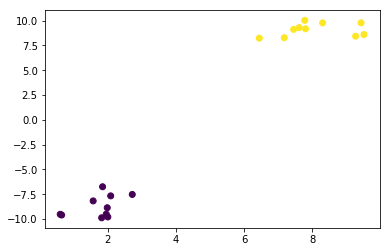

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.scatter(data[0][:,0],data[0][:,1],c=data[1]) 